In [78]:
# Initial imports
import pandas as pd
!pip install scikit-learn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [79]:
#Bringing in the dataset
avo_dataset = pd.read_csv("/Users/kristinpeters/Desktop/Avocadowork/avocado 2.csv")

avo_dataset.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [80]:
type(avo_dataset)

pandas.core.frame.DataFrame

In [81]:
#Need to create a Total Singles column, which is Total Volume minus Total Bags
avo_dataset["Total Singles"] = avo_dataset["Total Volume"] - avo_dataset["Total Bags"]

avo_dataset["Date"] = pd.to_datetime(avo_dataset["Date"])

def assign_season(month):
    if month in [1, 2, 12]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

avo_dataset["Season"] = avo_dataset["Date"].dt.month.apply(assign_season)


avo_dataset.head()





#avo_dataset = all data, no groupings 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Singles,Season
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,55539.75,Winter
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,45371.42,Winter
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,110074.87,Winter
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,73180.99,Winter
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,44855.65,Fall


In [82]:
avo_dataset.info

<bound method DataFrame.info of        Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

       

In [83]:
#creating new consolidated dataset that is only regions and only large categories

avo_data_consol = avo_dataset.drop(columns=["Small Bags", "Large Bags", "XLarge Bags", "4770", "4046", "4225"])

avo_data_consol["AveragePrice"] = avo_data_consol["AveragePrice"].astype(float)

avo_data_consol["Total Bags"] = avo_data_consol["Total Bags"].astype(int)

avo_data_consol["Total Singles"] = avo_data_consol["Total Singles"].astype(int)

avo_data_consol["Total Volume"] = avo_data_consol["Total Volume"].astype(int)

avo_data_consol["Month Week"] = pd.to_datetime(avo_data_consol["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "Total Volume", "Total Singles", "Total Bags", "type"]
avo_data_consol = avo_data_consol[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_consol = avo_data_consol[~avo_data_consol["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_consol.columns:
    avo_data_consol = avo_data_consol.drop(columns=["Unnamed: 0"])

avo_data_consol.set_index("Date", inplace=True)


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_consol.to_csv("avo_data_consol.csv", index=False)


avo_data_consol.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  Total Volume  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33         64236   
2015-12-20  2015      12/20            Albany          1.35         54876   
2015-12-13  2015      12/13            Albany          0.93        118220   
2015-12-06  2015      12/06            Albany          1.08         78992   
2015-11-29  2015      11/29            Albany          1.28         51039   
...          ...        ...               ...           ...           ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63         17074   
2018-01-28  2018      01/28  WestTexNewMexico          1.71         13888   
2018-01-21  2018      01/21  WestTexNewMexico          1.87         13766   
2018-01-14  2018      01/14  WestTexNewMexico          1.93         16205   
2018-01-07  2018      01/07  WestTexNewMexico 

In [84]:
pivot_table = avo_data_consol.pivot_table(
    values=["Total Volume", "Total Singles", "Total Bags"],
    index="year",
    aggfunc="sum"
)
print(pivot_table)



      Total Bags  Total Singles  Total Volume
year                                         
2015   191091031      879862626    1070955880
2016   374860893      807706109    1182569285
2017   410957429      793956606    1204916283
2018   119057527      216415245     335473304


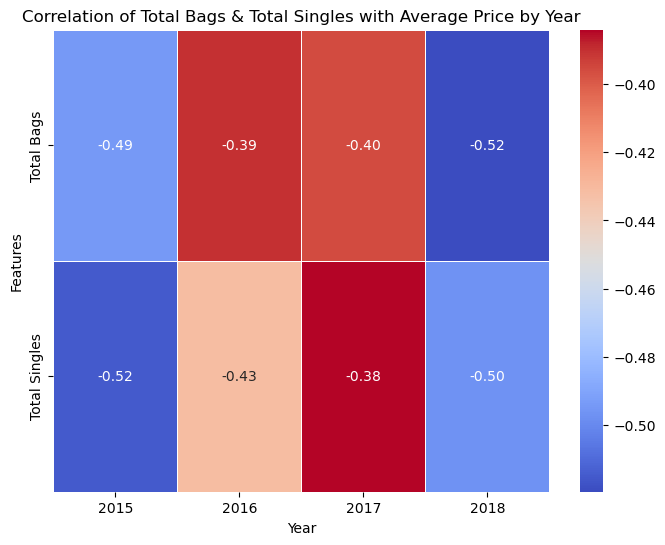

In [85]:
#correlation heatmap

correlation_matrices = avo_data_consol.groupby("year")[["Total Bags", "Total Singles", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Bags", "Total Singles"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Total Bags & Total Singles with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()

In [86]:
file_path = "avocado 2.csv"  
avo_data_variants = pd.read_csv(file_path)

print(avo_data_variants.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [87]:
#creating a new dataset that is only variants and no totals

#creating new consolidated dataset that is only regions and only large categories


avo_data_variants = avo_dataset.drop(columns=["Total Volume", "Total Bags"])

avo_data_variants["AveragePrice"] = avo_data_variants["AveragePrice"].astype(float)

avo_data_variants["Small Bags"] = avo_data_variants["Small Bags"].astype(int)

avo_data_variants["Large Bags"] = avo_data_variants["Large Bags"].astype(int)

avo_data_variants["XLarge Bags"] = avo_data_variants["XLarge Bags"].astype(int)

avo_data_variants["4046"] = avo_data_variants["4046"].astype(int)


avo_data_variants["4225"] = avo_data_variants["4225"].astype(int)

avo_data_variants["4770"] = avo_data_variants["4770"].astype(int)






avo_data_variants["Month Week"] = pd.to_datetime(avo_data_variants["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags", "type", "Season"]
avo_data_variants = avo_data_variants[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_variants["Date"] = pd.to_datetime(avo_data_variants["Date"])

def assign_season(month):
    if month in [1, 2, 12]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

avo_data_variants["Season"] = avo_data_variants["Date"].dt.month.apply(assign_season)

avo_data_variants = avo_data_variants[~avo_data_variants["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_variants.columns:
    avo_data_variants = avo_data_variants.drop(columns=["Unnamed: 0"])

avo_data_variants.set_index("Date", inplace=True)




avo_data_variants.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  4046    4225  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33  1036   54454   
2015-12-20  2015      12/20            Albany          1.35   674   44638   
2015-12-13  2015      12/13            Albany          0.93   794  109149   
2015-12-06  2015      12/06            Albany          1.08  1132   71976   
2015-11-29  2015      11/29            Albany          1.28   941   43838   
...          ...        ...               ...           ...   ...     ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63  2046    1529   
2018-01-28  2018      01/28  WestTexNewMexico          1.71  1191    3431   
2018-01-21  2018      01/21  WestTexNewMexico          1.87  1191    2452   
2018-01-14  2018      01/14  WestTexNewMexico          1.93  1527    2981   
2018-01-07  2018      01/07  WestTexNewMexico 

In [88]:


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

In [89]:
avo_data_variants.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  4046    4225  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33  1036   54454   
2015-12-20  2015      12/20            Albany          1.35   674   44638   
2015-12-13  2015      12/13            Albany          0.93   794  109149   
2015-12-06  2015      12/06            Albany          1.08  1132   71976   
2015-11-29  2015      11/29            Albany          1.28   941   43838   
...          ...        ...               ...           ...   ...     ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63  2046    1529   
2018-01-28  2018      01/28  WestTexNewMexico          1.71  1191    3431   
2018-01-21  2018      01/21  WestTexNewMexico          1.87  1191    2452   
2018-01-14  2018      01/14  WestTexNewMexico          1.93  1527    2981   
2018-01-07  2018      01/07  WestTexNewMexico 

In [90]:
#further combining the data because 4046 and Small Bags = total small avos, 4225 + Large Bags = total large avos, 4770 + XL Bags = total xl avos based on the
#Avocado Grower's site


avo_dataset["Total Small Avocados"] = avo_dataset["4046"] + avo_dataset["Small Bags"]
avo_dataset["Total Large Avocados"] = avo_dataset["4225"] + avo_dataset["Large Bags"]
avo_dataset["Total XLarge Avocados"] = avo_dataset["4770"] + avo_dataset["XLarge Bags"]

avo_data_variants["Total Small Avocados"] = avo_data_variants["4046"] + avo_data_variants["Small Bags"]
avo_data_variants["Total Large Avocados"] = avo_data_variants["4225"] + avo_data_variants["Large Bags"]
avo_data_variants["Total XLarge Avocados"] = avo_data_variants["4770"] + avo_data_variants["XLarge Bags"]



avo_sales_by_year_type = avo_data_variants.groupby(["Date", "year", "type"])[
    ["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "Season"]
].sum().reset_index()


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

avo_data_variants.head(
    
)



,year,Month Week,region,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados
Date,,,,,,,,,,,,,,,
2015-12-27,2015,12/27,Albany,1.33,1036,54454,48,8603,93,0,conventional,Winter,9639,54547,48
2015-12-20,2015,12/20,Albany,1.35,674,44638,58,9408,97,0,conventional,Winter,10082,44735,58
2015-12-13,2015,12/13,Albany,0.93,794,109149,130,8042,103,0,conventional,Winter,8836,109252,130
2015-12-06,2015,12/06,Albany,1.08,1132,71976,72,5677,133,0,conventional,Winter,6809,72109,72
2015-11-29,2015,11/29,Albany,1.28,941,43838,75,5986,197,0,conventional,Fall,6927,44035,75


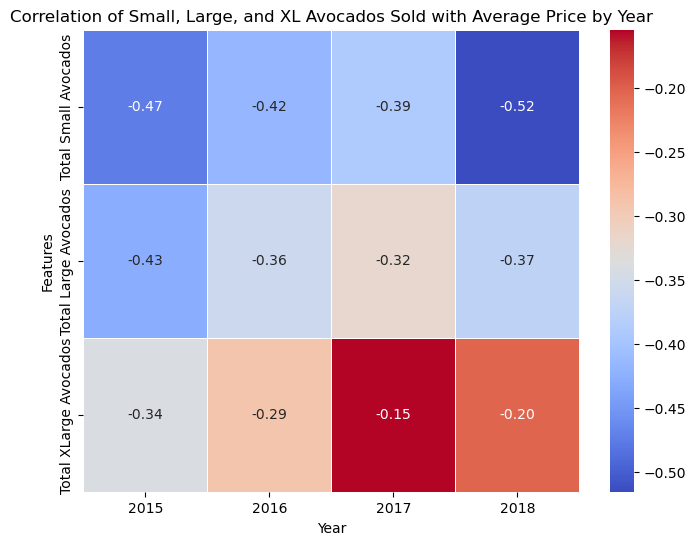

In [91]:
#checking out the new consolidations

avo_data_variants_graph = avo_data_variants[["year", "Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]]


correlation_matrices = avo_data_variants_graph.groupby("year")[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Small, Large, and XL Avocados Sold with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()




In [92]:
print(avo_data_variants.columns)


Index(['year', 'Month Week', 'region', 'AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'Season',
       'Total Small Avocados', 'Total Large Avocados',
       'Total XLarge Avocados'],
      dtype='object')


In [93]:
summary_statistics = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].describe().T

print(summary_statistics)



                         count           mean            std  min     25%  \
Total Small Avocados   15207.0  136448.491287  293453.931875  0.0  3318.5   
Total Large Avocados   15207.0  105259.825344  182160.970488  0.0  3114.5   
Total XLarge Avocados  15207.0    7774.305912   22014.904636  0.0     0.0   

                           50%       75%        max  
Total Small Avocados   23319.0  158028.5  4398237.0  
Total Large Avocados   25696.0  124031.5  2342560.0  
Total XLarge Avocados    143.0    4953.0   287275.0  


In [94]:
totals = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].sum()

print(totals)



Total Small Avocados     2074972207
Total Large Avocados     1600686164
Total XLarge Avocados     118223870
dtype: int64


In [95]:
zero_counts = (avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]] == 0).sum()
print(zero_counts)

Total Small Avocados        1
Total Large Avocados       21
Total XLarge Avocados    5141
dtype: int64


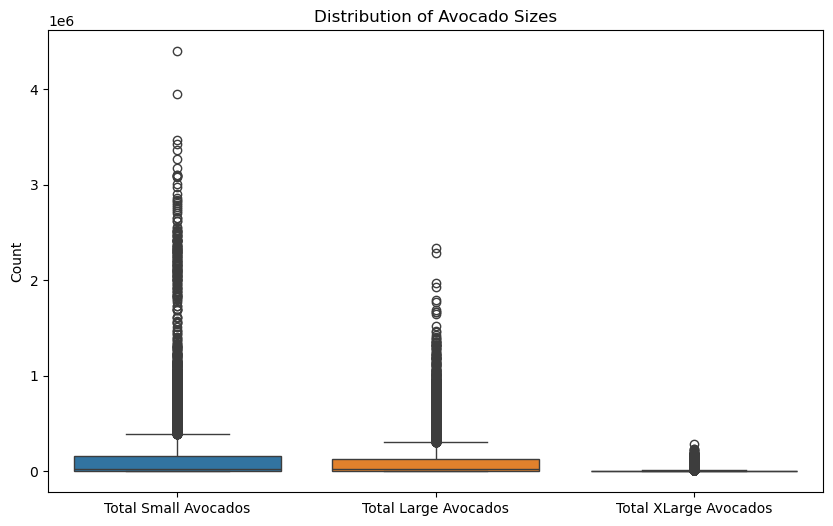

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]])
plt.title("Distribution of Avocado Sizes")
plt.ylabel("Count")
plt.show()

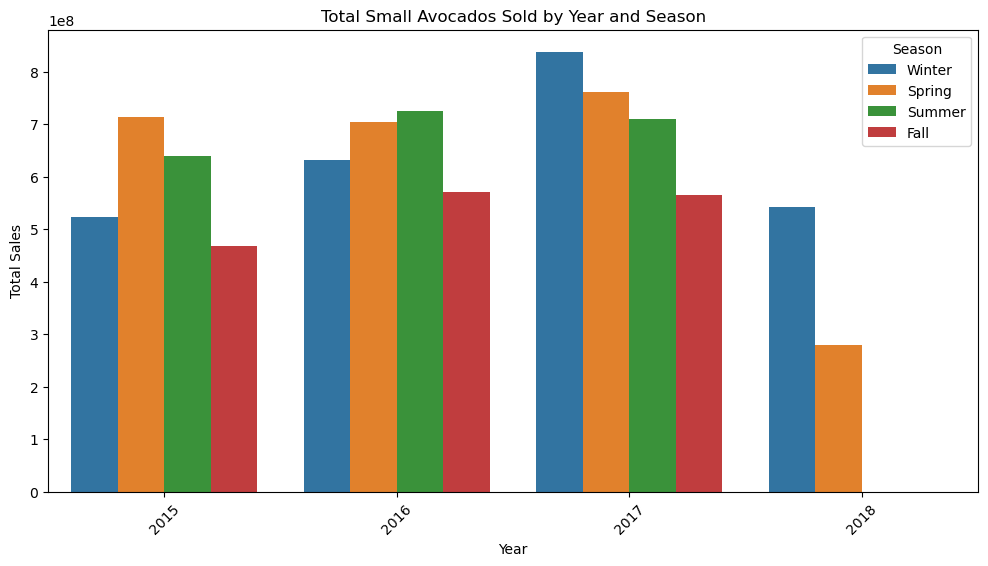

In [97]:
seasonal_sales = avo_dataset.groupby(["year", "Season"])[
    ["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]
].sum().reset_index()

season_order = ["Winter", "Spring", "Summer", "Fall"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="year", 
    y="Total Small Avocados", 
    hue="Season", 
    hue_order=season_order, 
    data=seasonal_sales
)
plt.title("Total Small Avocados Sold by Year and Season")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()

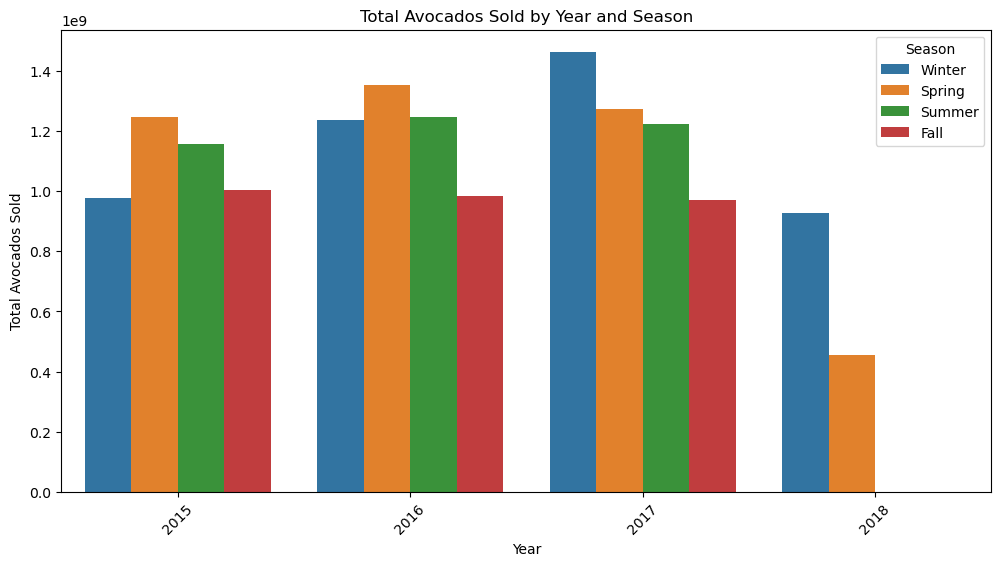

In [98]:
seasonal_comparison = avo_dataset.groupby(["year", "Season"])[
    ["Total Volume", "Total Small Avocados", "Total Large Avocados"]
].sum().reset_index()

season_order = ["Winter", "Spring", "Summer", "Fall"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="year", 
    y="Total Volume", 
    hue="Season", 
    hue_order=season_order, 
    data=seasonal_comparison
)

plt.title("Total Avocados Sold by Year and Season")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()





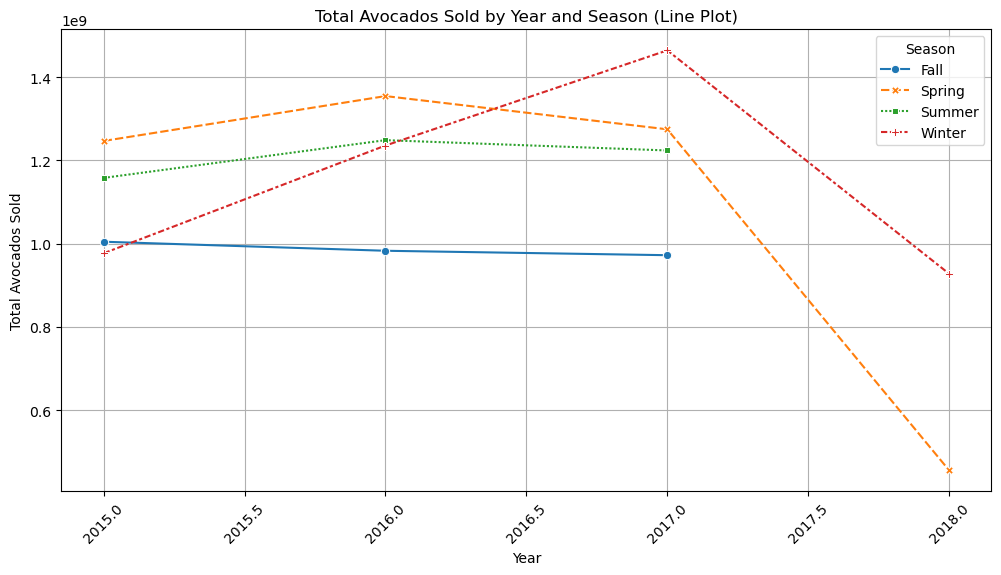

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="year", 
    y="Total Volume", 
    hue="Season", 
    style="Season", 
    markers=True, 
    data=seasonal_comparison
)
plt.title("Total Avocados Sold by Year and Season (Line Plot)")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



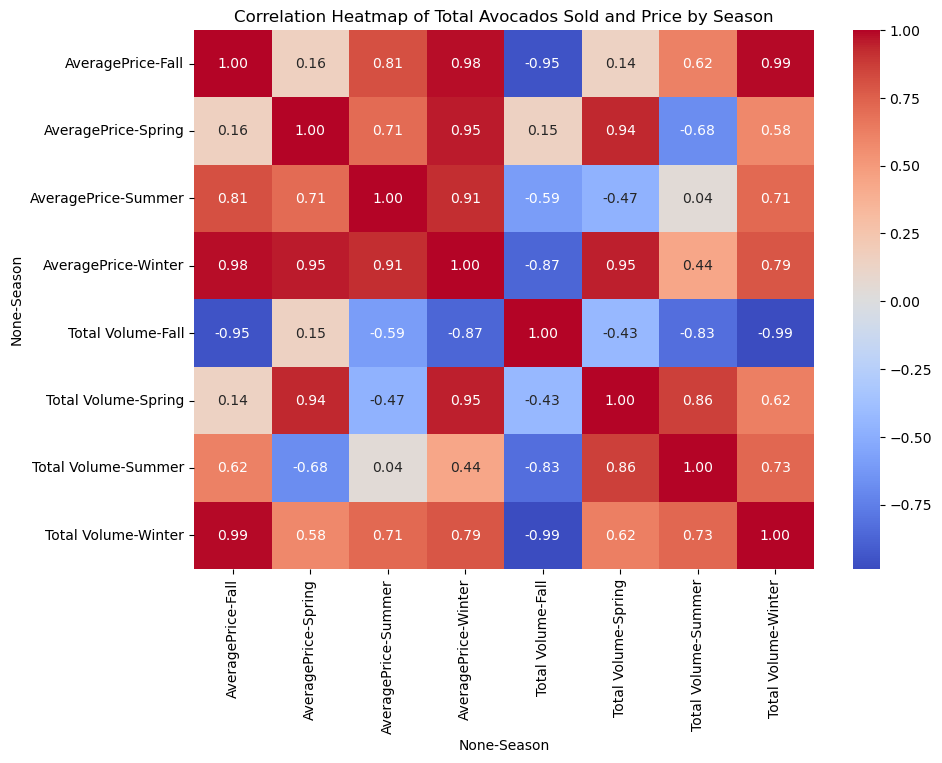

In [100]:
season_price_pivot = avo_dataset.pivot_table(
    values=["Total Volume", "AveragePrice"],
    index="year",
    columns="Season",
    aggfunc="sum"
)
season_price_correlation = season_price_pivot.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(season_price_correlation, annot=True, cmap="coolwarm", fmt=".2f")


plt.title("Correlation Heatmap of Total Avocados Sold and Price by Season")
plt.show()

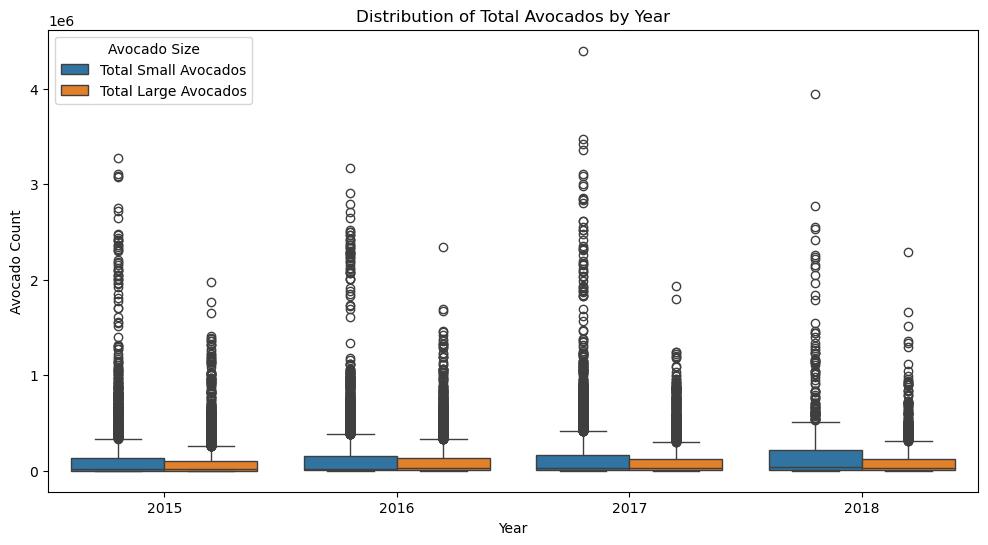

In [101]:
plt.figure(figsize=(12, 6))


avo_melted = avo_data_variants.melt(id_vars=["year"], value_vars=["Total Small Avocados", "Total Large Avocados"], 
                              var_name="Avocado Size", value_name="Count")

sns.boxplot(x="year", y="Count", hue="Avocado Size", data=avo_melted)
plt.title("Distribution of Total Avocados by Year")
plt.ylabel("Avocado Count")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.show()

<Figure size 1200x600 with 0 Axes>

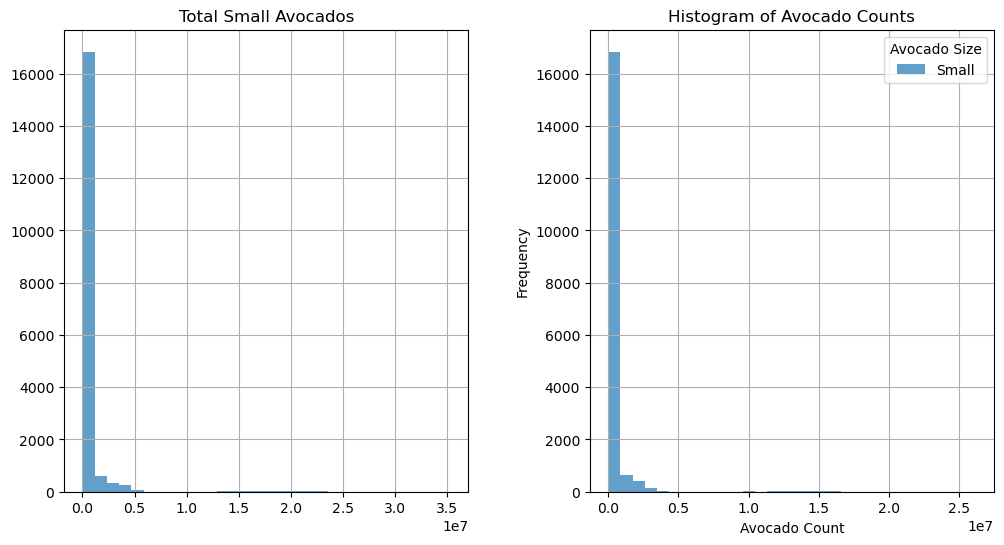

In [102]:
plt.figure(figsize=(12, 6))

avo_dataset[["Total Small Avocados", "Total Large Avocados"]].hist(bins=30, alpha=0.7, figsize=(12,6), label=["Small", "Large"])

plt.title("Histogram of Avocado Counts")
plt.xlabel("Avocado Count")
plt.ylabel("Frequency")
plt.legend(title="Avocado Size")
plt.show()

<Figure size 1200x600 with 0 Axes>

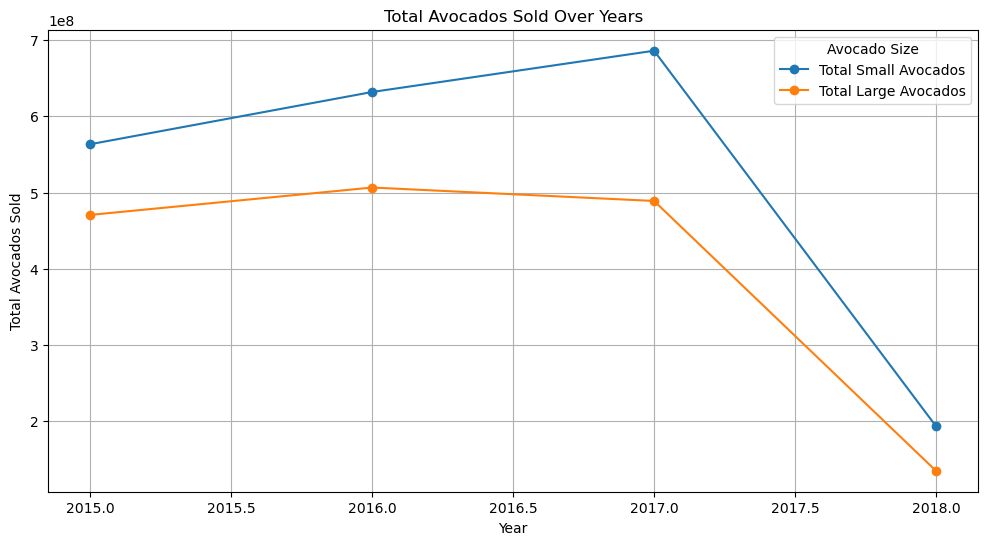

In [103]:
plt.figure(figsize=(12, 6))

yearly_totals = avo_data_variants.groupby("year")[["Total Small Avocados", "Total Large Avocados"]].sum()


yearly_totals.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Total Avocados Sold Over Years")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.grid()
plt.show()



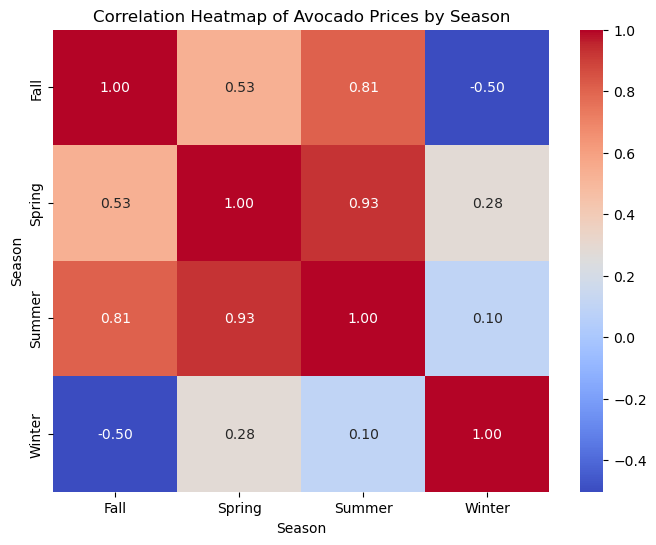

In [104]:
price_pivot = avo_dataset.pivot_table(
    values="AveragePrice", 
    index="year", 
    columns="Season", 
    aggfunc="mean"
)

correlation_matrix = price_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")


plt.title("Correlation Heatmap of Avocado Prices by Season")
plt.show()


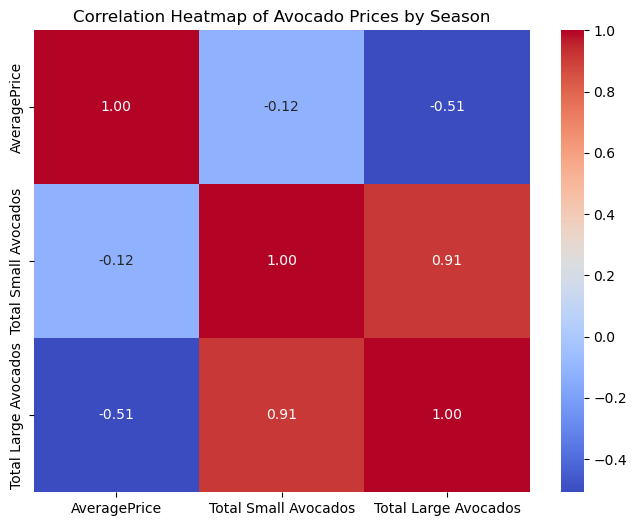

In [105]:

price_pivot = avo_dataset.groupby("year")[
    ["AveragePrice", "Total Small Avocados", "Total Large Avocados"]
].mean()

correlation_matrix = price_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Avocado Prices by Season")
plt.show()


In [106]:
# setting things up for handling n/a values

avo_dataset_ml= pd.get_dummies(avo_dataset, columns=["type"], drop_first=True)

avo_data_variants_ml = pd.get_dummies(avo_data_variants, columns=["type"], drop_first=True)



avo_dataset_ml.to_csv("avo_dataset_ml.csv", index=False)

avo_data_variants_ml.to_csv("avo_data_variants_ml.csv", index=False)


In [107]:
#decided to limit our analysis to small and large avos to simplify findings
# would have had to remove ~30% of the overall dataset due to high number of zero values in XLarge variant.  
#if time allows, we will go back and imput to solve for xLarge and run our overall analysis again.


In [108]:
avo_dataset_ml.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [109]:
avo_dataset_ml= avo_dataset_ml.drop(columns=["4770", "XLarge Bags"])

avo_dataset_ml.head(12)



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,6683.91,6556.47,127.44,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,8318.86,8196.81,122.05,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,6829.22,6266.85,562.37,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,11388.36,11104.53,283.83,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,8625.92,8061.47,564.45,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [110]:
avo_dataset_ml.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,6683.91,6556.47,127.44,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,8318.86,8196.81,122.05,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,6829.22,6266.85,562.37,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,11388.36,11104.53,283.83,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,8625.92,8061.47,564.45,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [111]:
avo_dataset_ml = avo_dataset_ml.loc[(avo_dataset_ml["Total Small Avocados"] != 0) & (avo_dataset_ml["Total Large Avocados"] != 0)]


In [112]:
total_rows = avo_dataset_ml.shape[0]  
print(f"Total rows in the dataset: {total_rows}")

Total rows in the dataset: 18227


In [113]:
avo_dataset_ml.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False


In [114]:
if "Unnamed: 0" in avo_dataset_ml.columns:
    avo_dataset_ml = avo_dataset_ml.drop(columns=["Unnamed: 0"])

avo_dataset_ml.set_index("Date", inplace=True)



In [115]:
avo_dataset_ml.head()

,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
Date,,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False


Mean Squared Error: 170549560405.2831
R-squared Score: 0.9192


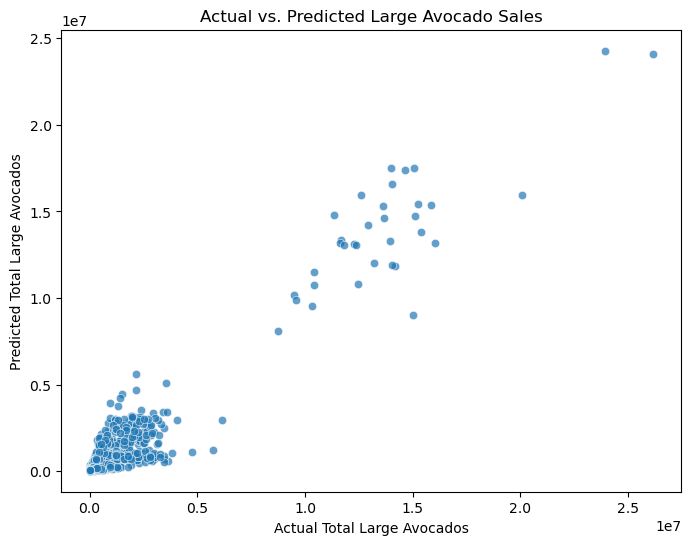

In [116]:
#doing a regression analysis on avocado sizes

X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 276894562322.6763
R-squared Score: 0.8992


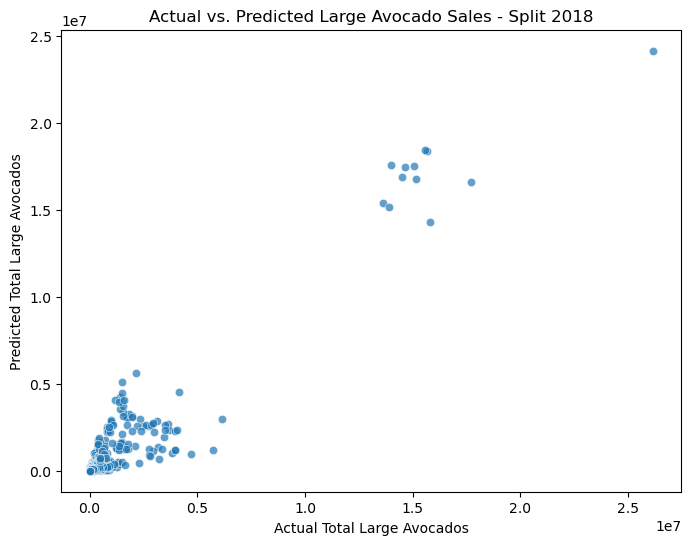

In [117]:
#doing a regression analysis on avocado sizes - trying with split test/train

X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016, 2017])]
test_data = avo_dataset[avo_dataset["Date"].dt.year == 2018]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales - Split 2018")
plt.show()


Mean Squared Error: 241597325561.9456
R-squared Score: 0.8855


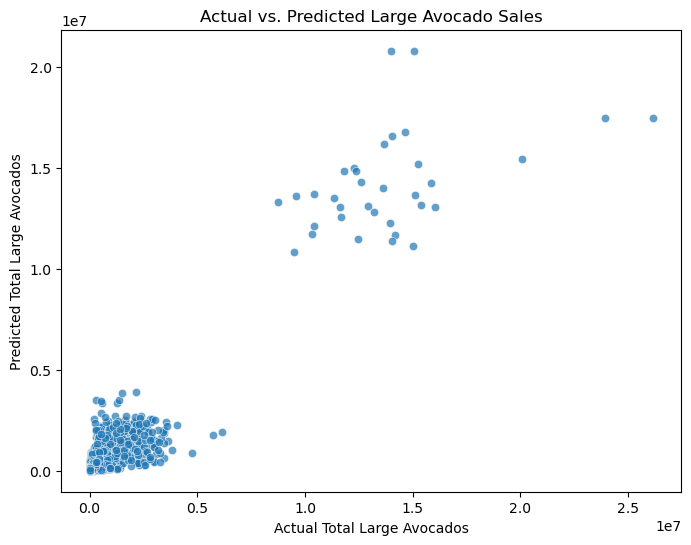

In [118]:
#doing a regression analysis on avocado sizes

from sklearn.ensemble import RandomForestRegressor


X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 350487682901.1068
R-squared Score: 0.8724


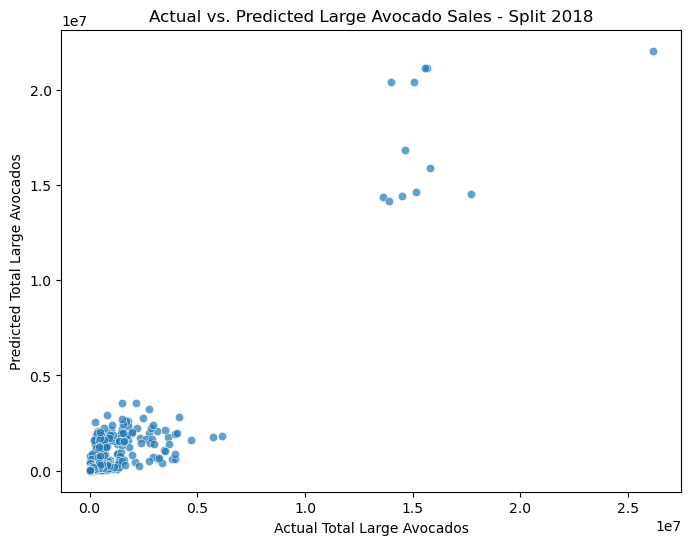

In [119]:
#doing a regression analysis on avocado sizes - split test and train

from sklearn.ensemble import RandomForestRegressor


train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016, 2017])]
test_data = avo_dataset[avo_dataset["Date"].dt.year == 2018]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales - Split 2018")
plt.show()


Mean Squared Error: 326230291883.4870
R-squared Score: 0.8455


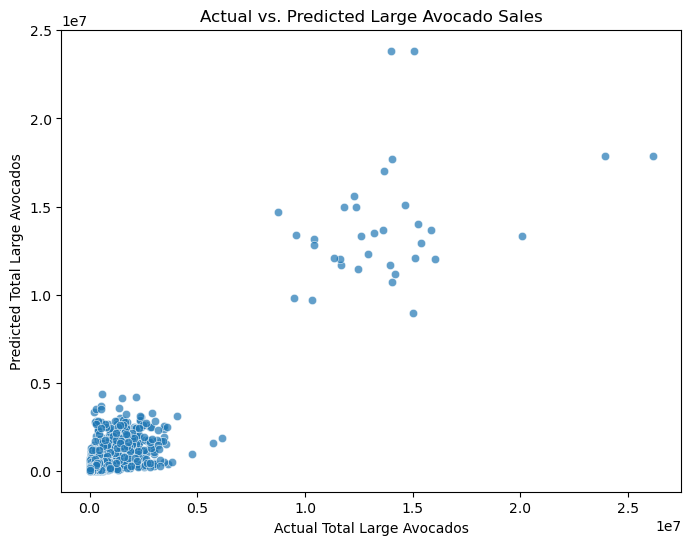

In [120]:
#doing a regression analysis on avocado sizes

from sklearn.tree import DecisionTreeRegressor


X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 351477936855.3479
R-squared Score: 0.8255


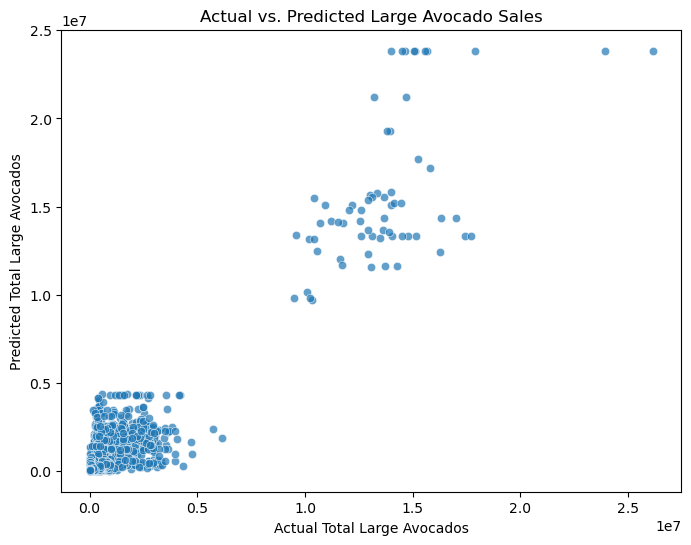

In [121]:
#doing a regression analysis on avocado sizes

from sklearn.tree import DecisionTreeRegressor


train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016])]
test_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2017, 2018])]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


In [122]:
# do a prediction on season
#figure out the story...
#figure out the presentation

# use distribution or scaling but not both at the same time


# do a distribution of prices on conventional and organic separately 
# predict org and conventional 

In [123]:
print(avo_dataset.columns)


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Total Singles', 'Season', 'Total Small Avocados',
       'Total Large Avocados', 'Total XLarge Avocados'],
      dtype='object')


In [124]:
print(avo_dataset["type"].unique())

['conventional' 'organic']


In [125]:
avo_dataset["type"] = avo_dataset["type"].str.lower()

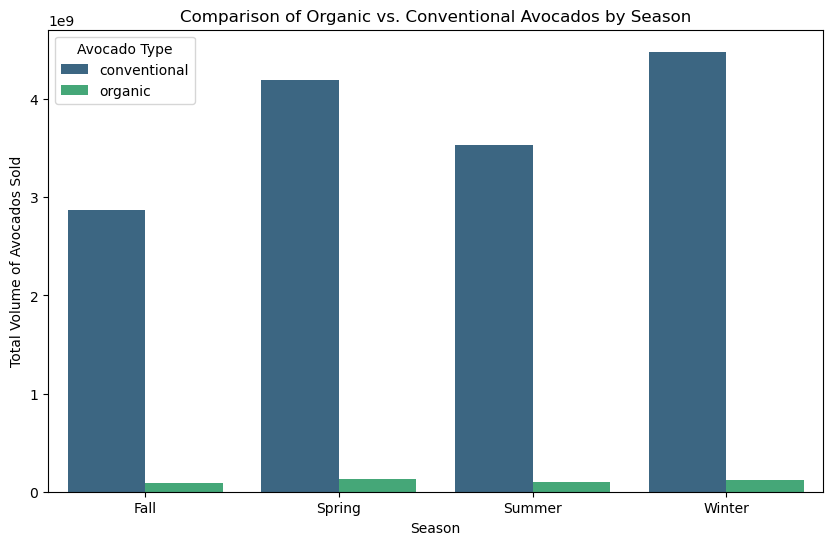

In [126]:
#looking at conventional vs. organic

type_seasonal_sales = avo_dataset.groupby(["Season", "type"])["Total Volume"].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(
    x="Season", 
    y="Total Volume", 
    hue="type", 
    data=type_seasonal_sales, 
    palette="viridis"
)

plt.title("Comparison of Organic vs. Conventional Avocados by Season")
plt.xlabel("Season")
plt.ylabel("Total Volume of Avocados Sold")
plt.legend(title="Avocado Type")
plt.show()

In [127]:
#making sure formatting is correct for me to analyze conventional vs organic

avo_dataset.rename(columns={"Type": "type"}, inplace=True)


In [128]:
#confirming that the values in the type column are able to be categorized:

print(avo_dataset["type"].unique())

['conventional' 'organic']


Logistic Regression - Accuracy: 0.9088
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1820
           1       0.87      0.97      0.91      1830

    accuracy                           0.91      3650
   macro avg       0.91      0.91      0.91      3650
weighted avg       0.91      0.91      0.91      3650



/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


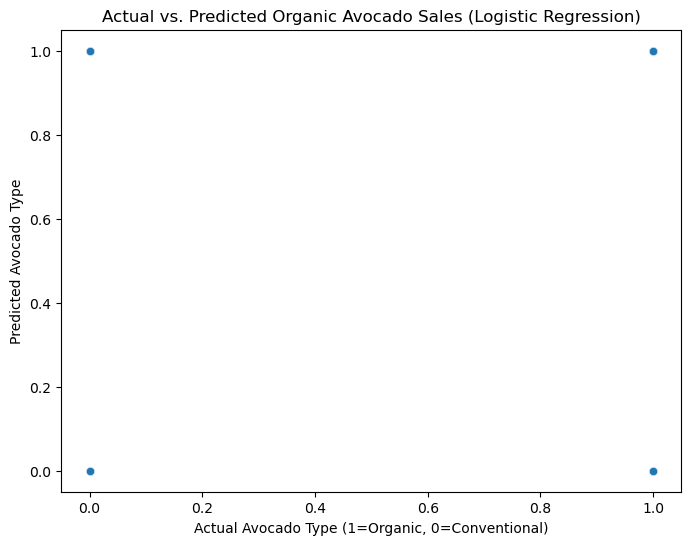

In [129]:
#trying to predict organic avocado sales using regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

avo_dataset["type"] = avo_dataset["type"].map({"organic": 1, "conventional": 0})

X = avo_dataset[["Total Volume", "Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]]
y = avo_dataset["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Avocado Type (1=Organic, 0=Conventional)")
plt.ylabel("Predicted Avocado Type")
plt.title("Actual vs. Predicted Organic Avocado Sales (Logistic Regression)")
plt.show()



In [130]:
#yikes

Random Forest Classifier (Reduced Features) - Accuracy: 0.8797
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1820
           1       0.87      0.89      0.88      1830

    accuracy                           0.88      3650
   macro avg       0.88      0.88      0.88      3650
weighted avg       0.88      0.88      0.88      3650



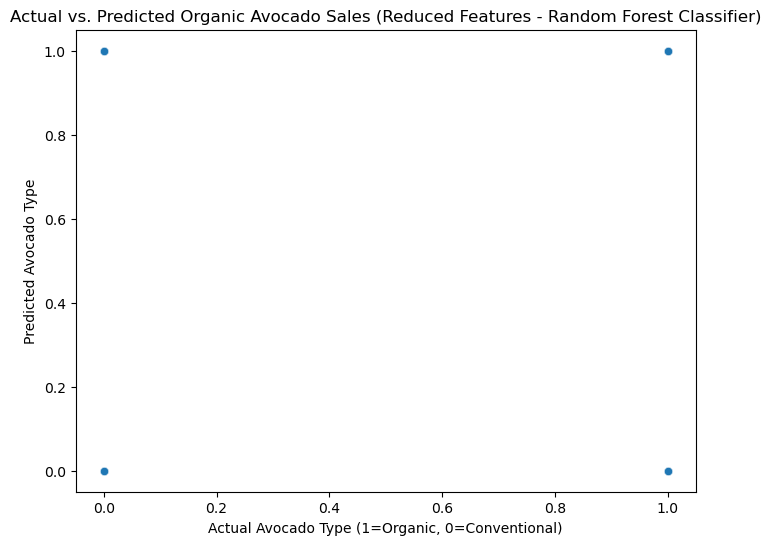

In [131]:
#trying a rerun on organic using only total avocados

X_train_reduced = X_train[["Total Volume"]]
X_test_reduced = X_test[["Total Volume"]]

rf_classifier_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_reduced.fit(X_train_reduced, y_train)

y_pred_rf_reduced = rf_classifier_reduced.predict(X_test_reduced)

accuracy_rf_reduced = accuracy_score(y_test, y_pred_rf_reduced)
classification_rep_rf_reduced = classification_report(y_test, y_pred_rf_reduced)

print(f"Random Forest Classifier (Reduced Features) - Accuracy: {accuracy_rf_reduced:.4f}")
print("Classification Report:\n", classification_rep_rf_reduced)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf_reduced, alpha=0.7)
plt.xlabel("Actual Avocado Type (1=Organic, 0=Conventional)")
plt.ylabel("Predicted Avocado Type")
plt.title("Actual vs. Predicted Organic Avocado Sales (Reduced Features - Random Forest Classifier)")
plt.show()


Logistic Regression - Accuracy: 0.8816
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1820
           1       0.84      0.95      0.89      1830

    accuracy                           0.88      3650
   macro avg       0.89      0.88      0.88      3650
weighted avg       0.89      0.88      0.88      3650


Model Comparison:
                      Model  Accuracy
0  Random Forest Classifier  0.879726
1       Logistic Regression  0.881644


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_50817/1156542691.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=model_comparison, palette="viridis")


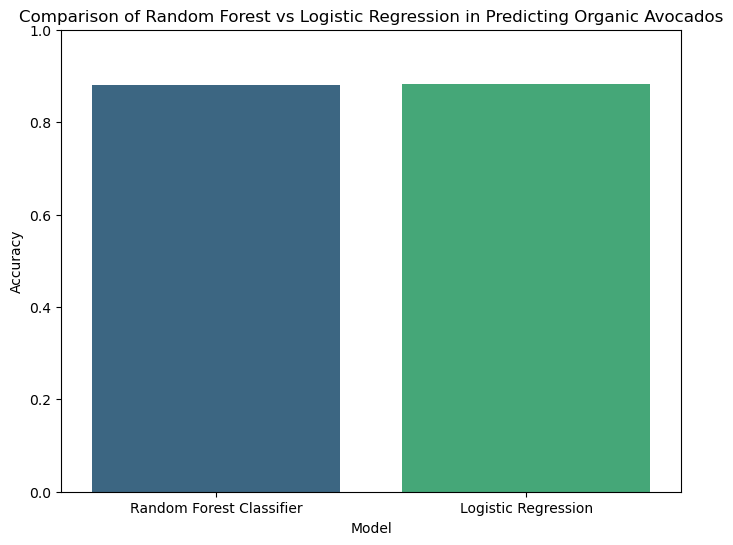

In [132]:
#comparing the models

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_reduced, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_reduced)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report (Logistic Regression):\n", classification_rep_log_reg)

model_comparison = pd.DataFrame({
    "Model": ["Random Forest Classifier", "Logistic Regression"],
    "Accuracy": [accuracy_rf_reduced, accuracy_log_reg]
})

print("\nModel Comparison:")
print(model_comparison)

plt.figure(figsize=(8,6))
sns.barplot(x="Model", y="Accuracy", data=model_comparison, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Comparison of Random Forest vs Logistic Regression in Predicting Organic Avocados")
plt.show()


In [133]:
model_comparison = pd.DataFrame({
    "Model": ["Random Forest Classifier", "Logistic Regression"],
    "Accuracy": [accuracy_rf_reduced, accuracy_log_reg]
})

print(model_comparison)


                      Model  Accuracy
0  Random Forest Classifier  0.879726
1       Logistic Regression  0.881644


In [136]:
#now trying to predict fall data using full year fall data (random forest 
# regression didn't work so trying a different model):
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX



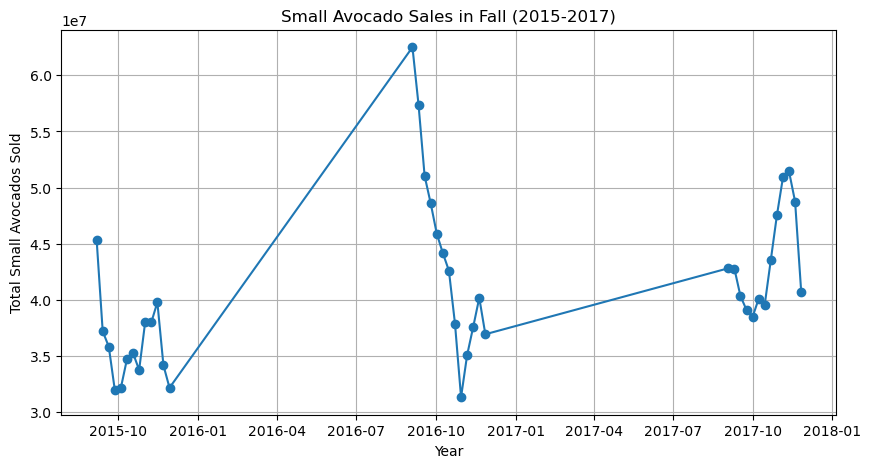

In [135]:
fall_data = avo_dataset[avo_dataset["Season"] == "Fall"]

fall_sales = fall_data.groupby(["Date"])["Total Small Avocados"].sum().reset_index()

fall_sales.set_index("Date", inplace=True)

plt.figure(figsize=(10,5))
plt.plot(fall_sales, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Small Avocados Sold")
plt.title("Small Avocado Sales in Fall (2015-2017)")
plt.grid()
plt.show()


In [137]:
print(avo_dataset[avo_dataset["Season"] == "Fall"].head())


   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   
5           5 2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6 2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7 2015-11-08          0.98     109428.33   703.75  101815.36   
8           8 2015-11-01          1.02      99811.42  1022.15   87315.57   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
4  75.78     6183.95     5986.26      197.69          0.0     0  2015  Albany   
5  43.61     6683.91     6556.47      127.44          0.0     0  2015  Albany   
6  93.26     8318.86     8196.81      122.05          0.0     0  2015  Albany   
7  80.00     6829.22     6266.85      562.37          0.0     0  2015  Albany   
8  85.34    11388.36    11104.53      283.83          0.0     0  2015  Albany   

   Total Singles Season  Total Small Avocados  Total Lar

/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will

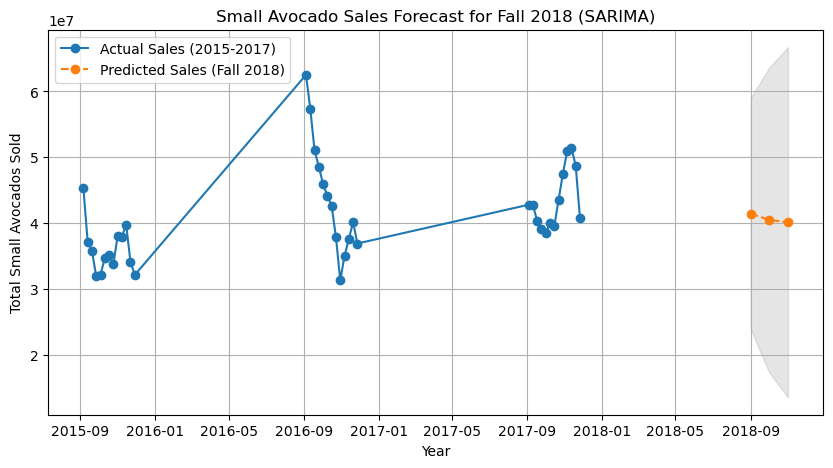

Predicted Small Avocado Sales for Fall 2018:
39    4.146461e+07
40    4.048893e+07
41    4.014545e+07
Name: predicted_mean, dtype: float64


In [138]:
sarima_model = SARIMAX(
    fall_sales,
    order=(1, 1, 1),  
    seasonal_order=(1, 1, 1, 12), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit()

forecast_steps = 3  
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start="2018-09-01", periods=forecast_steps, freq="MS")

forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(fall_sales, label="Actual Sales (2015-2017)", marker='o')
plt.plot(forecast_index, forecast.predicted_mean, label="Predicted Sales (Fall 2018)", marker='o', linestyle="dashed")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Total Small Avocados Sold")
plt.title("Small Avocado Sales Forecast for Fall 2018 (SARIMA)")
plt.legend()
plt.grid()
plt.show()

print("Predicted Small Avocado Sales for Fall 2018:")
print(forecast.predicted_mean)

In [ ]:
predicted_sales = [4.146461e+07, 4.048893e+07, 4.014545e+07]

average_price_per_avocado = 1.00 #assuming each avocado costs $1 for simplicity

predicted_revenue = [sales * average_price_per_avocado for sales in predicted_sales]

fall_2018_revenue_forecast = pd.DataFrame({
    "Month": ["September 2018", "October 2018", "November 2018"],
    "Predicted Sales (Units)": [int(sales) for sales in predicted_sales],
    "Predicted Revenue (USD)": [f"${revenue:,.2f}" for revenue in predicted_revenue]
})

print(fall_2018_revenue_forecast)



            Month  Predicted Sales (Units) Predicted Revenue (USD)
0  September 2018                 41464610          $41,464,610.00
1    October 2018                 40488930          $40,488,930.00
2   November 2018                 40145450          $40,145,450.00


In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd

In [146]:
df_prophet = avo_dataset[['Date', 'Total Small Avocados']]
df_prophet['Date'] = pd.to_datetime(df_prophet['Date'])

df_prophet = df_prophet[(df_prophet['Date'] >= '2015-01-01') & (df_prophet['Date'] <= '2017-12-31')]

df_prophet = df_prophet.groupby('Date').sum().reset_index()

df_prophet.rename(columns={'Date': 'ds', 'Total Small Avocados': 'y'}, inplace=True)


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_50817/2975794794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['Date'] = pd.to_datetime(df_prophet['Date'])


20:46:29 - cmdstanpy - INFO - Chain [1] start processing
20:46:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
400,2018-09-01,5.515003e+07,4.862681e+07,6.188394e+07
401,2018-09-02,5.491698e+07,4.810857e+07,6.177887e+07
402,2018-09-03,5.467172e+07,4.781118e+07,6.116732e+07
403,2018-09-04,5.441429e+07,4.770353e+07,6.090584e+07
404,2018-09-05,5.414458e+07,4.746628e+07,6.103099e+07


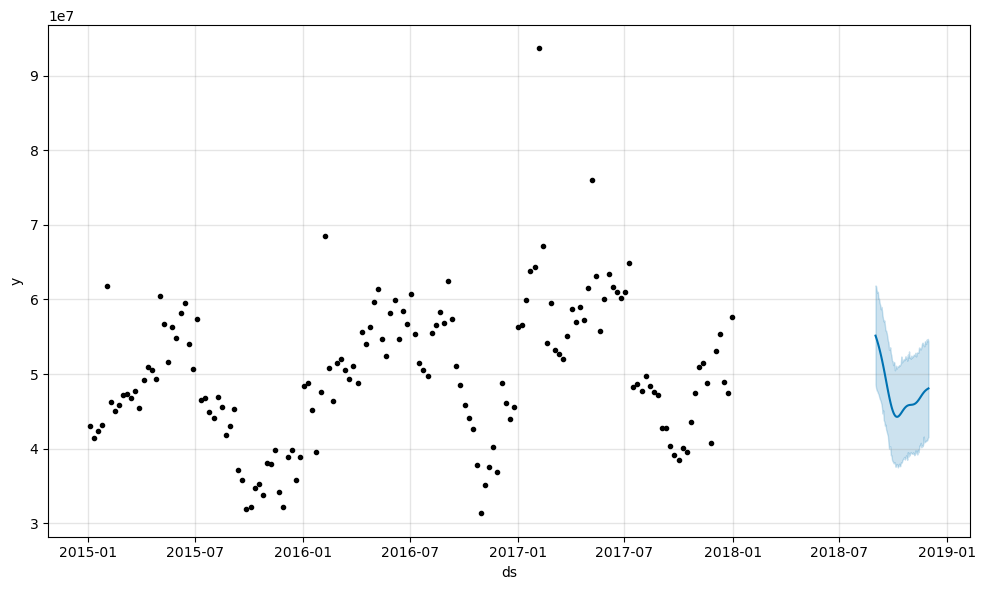

In [147]:
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365) 
forecast = model.predict(future)

forecast_fall_2018 = forecast[(forecast['ds'] >= '2018-09-01') & (forecast['ds'] <= '2018-11-30')]

model.plot(forecast_fall_2018)

forecast_fall_2018[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


21:04:00 - cmdstanpy - INFO - Chain [1] start processing
21:04:00 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 2018-03-26  6.417899e+07  5.686713e+07  7.192557e+07
1 2018-03-27  6.387282e+07  5.744008e+07  7.111480e+07
2 2018-03-28  6.355142e+07  5.626246e+07  7.066474e+07
3 2018-03-29  6.322543e+07  5.571211e+07  7.028646e+07
4 2018-03-30  6.290563e+07  5.590534e+07  6.989969e+07


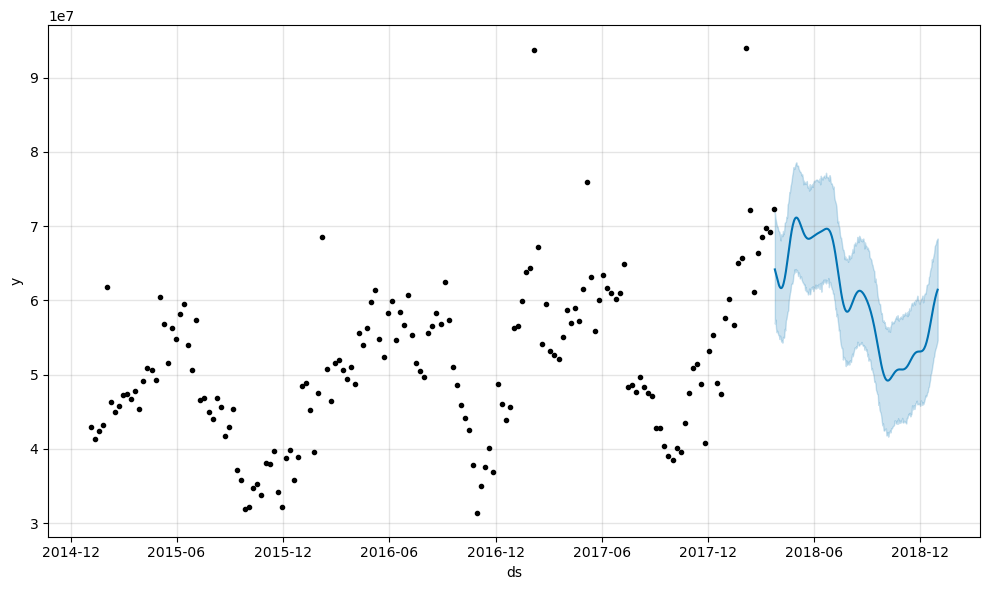

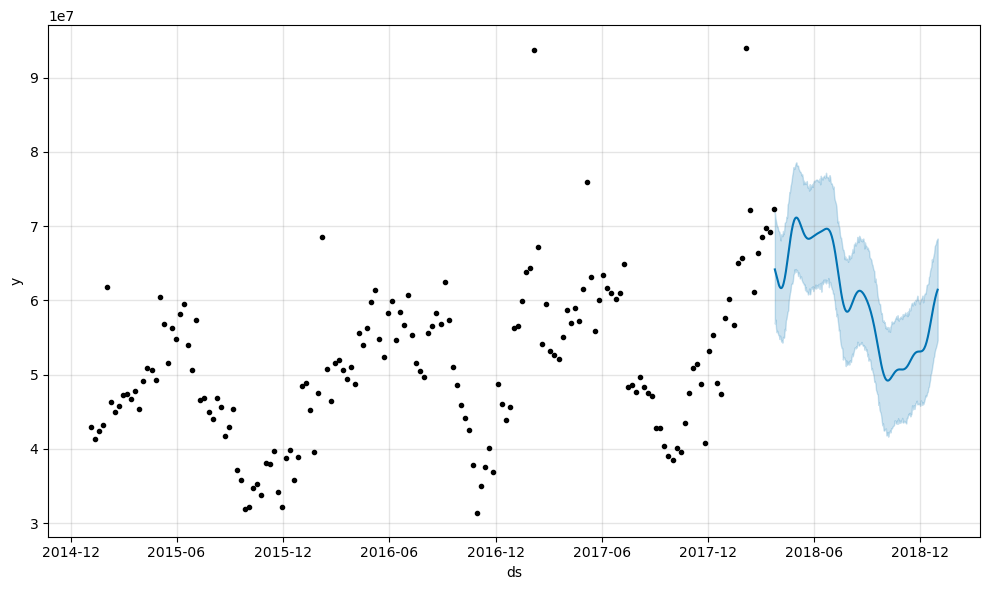

In [150]:
#adjusting to forecast the remainder of the year for 2018 (vs just Fall)

df_prophet = avo_dataset[['Date', 'Total Small Avocados']].copy()  
df_prophet.loc[:, 'Date'] = pd.to_datetime(df_prophet['Date'])

df_prophet = df_prophet[(df_prophet['Date'] >= '2015-01-01') & (df_prophet['Date'] <= '2018-03-25')]

df_prophet = df_prophet.groupby('Date').sum().reset_index()

df_prophet.rename(columns={'Date': 'ds', 'Total Small Avocados': 'y'}, inplace=True)

model = Prophet()
model.fit(df_prophet)

future_dates = pd.date_range(start='2018-03-26', end='2018-12-31')
future_df = pd.DataFrame({'ds': future_dates})

forecast = model.predict(future_df)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)




In [151]:
#calculating price elasticity of total avocados

df_elasticity = avo_dataset[['AveragePrice', 'Total Volume']].copy()

df_elasticity.dropna(inplace=True)

df_elasticity['log_price'] = np.log(df_elasticity['AveragePrice'])
df_elasticity['log_quantity'] = np.log(df_elasticity['Total Volume'])

X = df_elasticity['log_price']
y = df_elasticity['log_quantity']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

elasticity = model.params['log_price']
print(f"\nEstimated Price Elasticity of Demand: {elasticity:.3f}")

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     9853.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:06:28   Log-Likelihood:                -37102.
No. Observations:               18249   AIC:                         7.421e+04
Df Residuals:                   18247   BIC:                         7.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7208      0.020    646.314      0.0

In [ ]:
#this means that avocados have high elasticity: a 1% increase in 
#avocado prices means a 4.66% decrease in quantity demanded (purchased)
#this means consumers are VERY sensitive to the price changes of avocados
# this also means that, conversely, if you lower the price of avocados,
#you should see significant movement in purchase volume

#the model is stat sig (F-stat of 9853, p-value of 0.00), with a high 
# degree of confidence

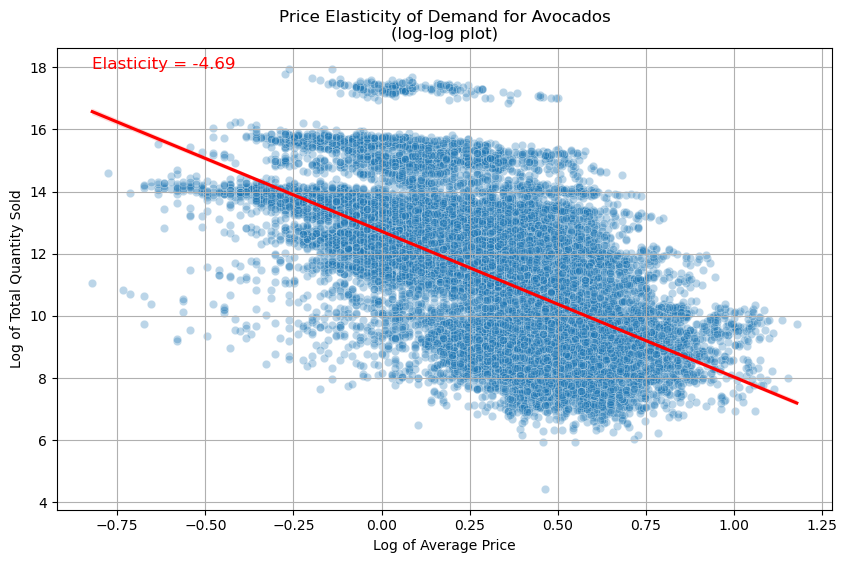

In [152]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='log_price', y='log_quantity', data=df_elasticity, alpha=0.3)

sns.regplot(x='log_price', y='log_quantity', data=df_elasticity, scatter=False, color='red')

plt.title('Price Elasticity of Demand for Avocados\n(log-log plot)')
plt.xlabel('Log of Average Price')
plt.ylabel('Log of Total Quantity Sold')


elasticity = -4.688 
plt.text(x=df_elasticity['log_price'].min(), 
         y=df_elasticity['log_quantity'].max(), 
         s=f'Elasticity = {elasticity:.2f}', 
         fontsize=12, color='red')

plt.grid(True)
plt.show()

In [154]:
#cool!

#now i want to see if the price elasticity of demand changed 
# between 2015 vs 2017 (2017 had a very high consumption volume)
#first approach - each regression separately, then compare

df = pd.read_csv('avo_dataset.csv')

df['log_price'] = np.log(df['AveragePrice'])
df['log_quantity'] = np.log(df['Total Volume'])

df_2015 = df[df['year'] == 2015]
df_2017 = df[df['year'] == 2017]

X_2015 = sm.add_constant(df_2015['log_price'])
model_2015 = sm.OLS(df_2015['log_quantity'], X_2015).fit()

X_2017 = sm.add_constant(df_2017['log_price'])
model_2017 = sm.OLS(df_2017['log_quantity'], X_2017).fit()

print("Elasticity 2015:", model_2015.params['log_price'], "\n", model_2015.summary())
print("\nElasticity 2017:", model_2017.params['log_price'], "\n", model_2017.summary())




Elasticity 2015: -6.701330225600425 
                             OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     7626.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:14:41   Log-Likelihood:                -10562.
No. Observations:                5615   AIC:                         2.113e+04
Df Residuals:                    5613   BIC:                         2.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

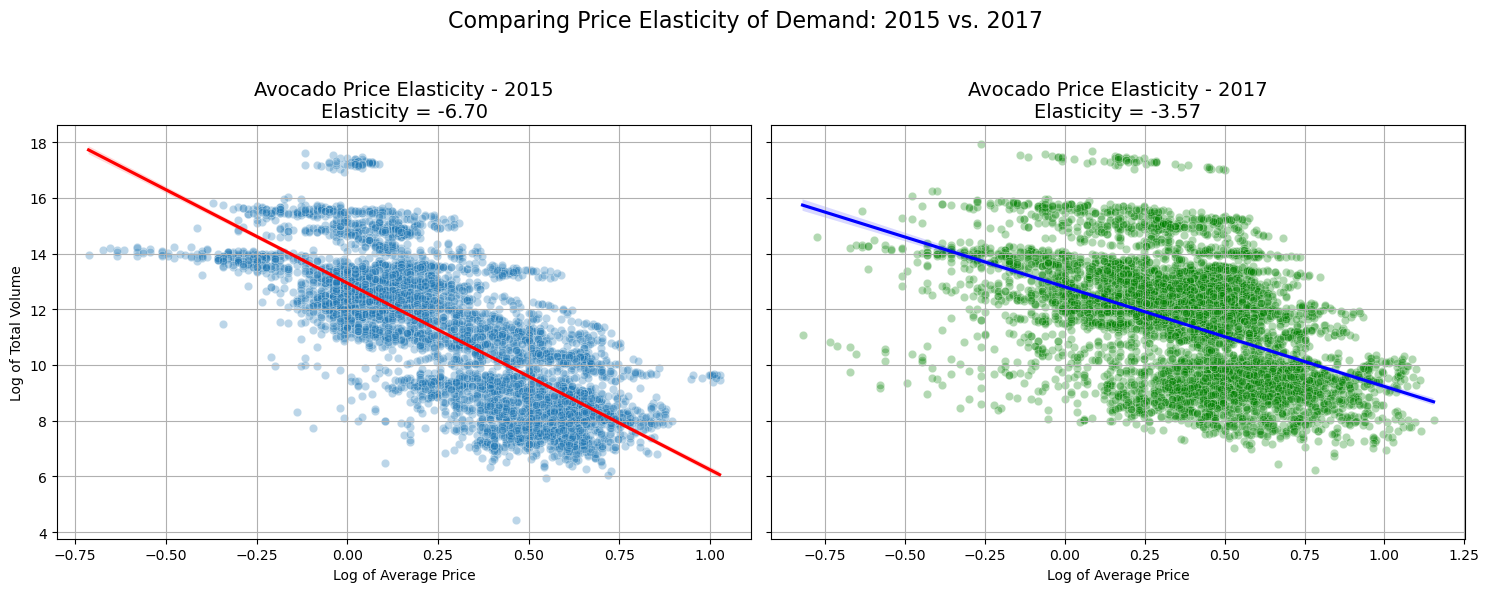

In [156]:
#visualizing the above

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.scatterplot(ax=axes[0], x='log_price', y='log_quantity', data=df_2015, alpha=0.3)
sns.regplot(ax=axes[0], x='log_price', y='log_quantity', data=df_2015, scatter=False, color='red')
axes[0].set_title('Avocado Price Elasticity - 2015\nElasticity = -6.70', fontsize=14)
axes[0].set_xlabel('Log of Average Price')
axes[0].set_ylabel('Log of Total Volume')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x='log_price', y='log_quantity', data=df_2017, alpha=0.3, color='green')
sns.regplot(ax=axes[1], x='log_price', y='log_quantity', data=df_2017, scatter=False, color='blue')
axes[1].set_title('Avocado Price Elasticity - 2017\nElasticity = -3.57', fontsize=14)
axes[1].set_xlabel('Log of Average Price')
axes[1].grid(True)

fig.suptitle('Comparing Price Elasticity of Demand: 2015 vs. 2017', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
